In [1]:
import umap
import umap.plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from top2vec import Top2Vec
from bokeh.plotting import output_file, save

In [2]:
model = Top2Vec.load("./../models/210205 - top2vec.model")
reduced_topics = model.hierarchical_topic_reduction(20)

In [3]:
umap_args = {
    "n_neighbors": 15,
    "n_components": 2, # plotting is currently only implemented for 2d embeddings
    "metric": "cosine",
    "random_state": 42,
}
umap_model = umap.UMAP(**umap_args).fit(model._get_document_vectors(norm=False))

---

In [26]:
mappings = pd.read_csv("../data/processed/topic-labels.csv").set_index("topic")["label"].to_dict()

In [30]:
model.labels = np.vectorize(mappings.get)(model.doc_top_reduced)

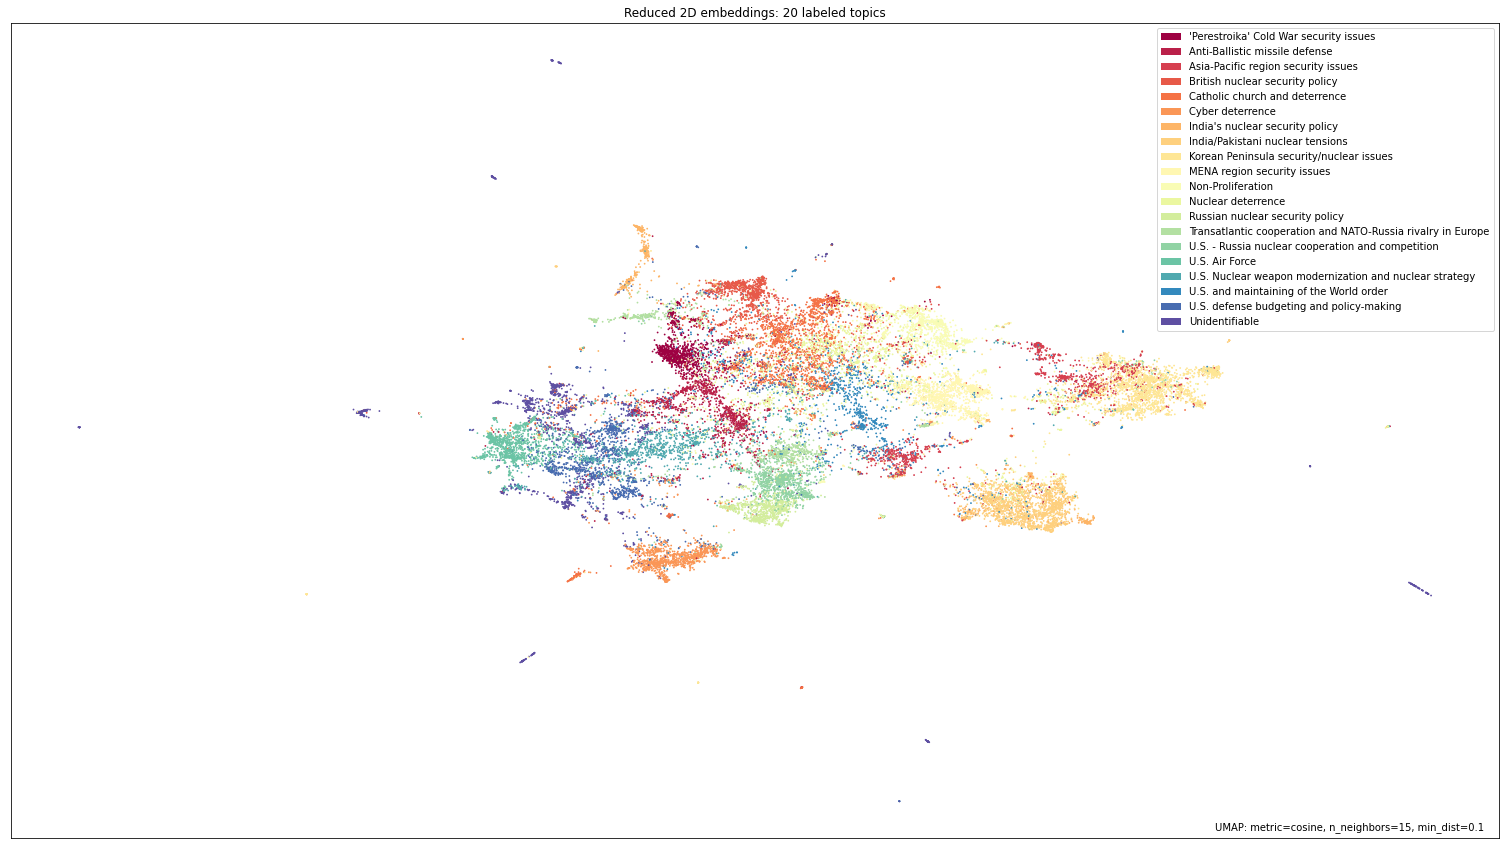

In [43]:
ax = umap.plot.points(umap_model, labels=model.labels, width=1920, height=1080)
ax.set_title(f"Reduced 2D embeddings: 20 labeled topics")
plt.savefig(
    f"./../reports/figures/umap-points-reduced-20-labeled-topics.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

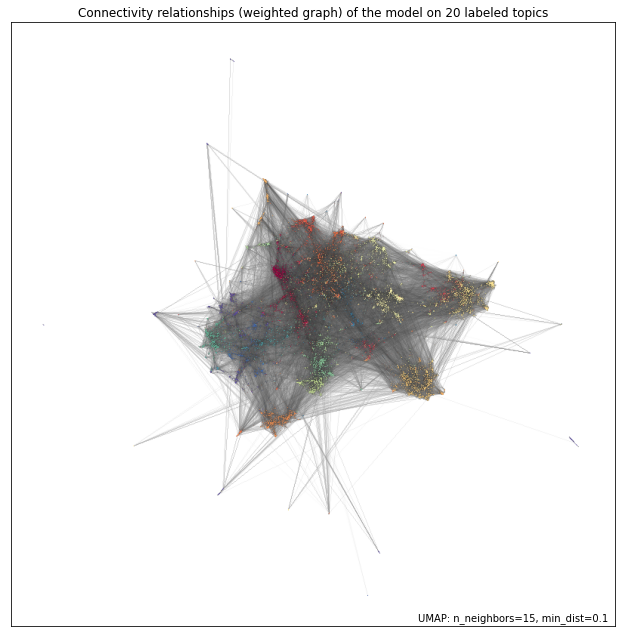

In [44]:
ax = umap.plot.connectivity(
    umap_model, 
    labels=model.labels, 
    show_points=True,  
)
ax.set_title("Connectivity relationships (weighted graph) of the model on 20 labeled topics")
plt.savefig(
    "./../reports/figures/umap-connectivity.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

In [47]:
hover_data = pd.DataFrame({
    "doc_id": model.document_ids,
    "text": [doc[:250] for doc in model.documents],
    "label": model.labels,
    "doc_top": model.doc_top,
    "doc_dist": model.doc_dist,
    "doc_top_reduced": model.doc_top_reduced,
    "doc_dist_reduced": model.doc_dist_reduced
})

In [48]:
p = umap.plot.interactive(umap_model, labels=model.labels, hover_data=hover_data, point_size=2)
output_file("../reports/figures/bokeh.html")
save(p)

'C:\\github\\top2vec\\reports\\figures\\bokeh.html'